
# NEXRAD Level 3 File

Use MetPy to read information from a NEXRAD Level 3 (NIDS product) file and plot


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
from metpy.io import Level3File
from metpy.plots import add_metpy_logo, add_timestamp, colortables

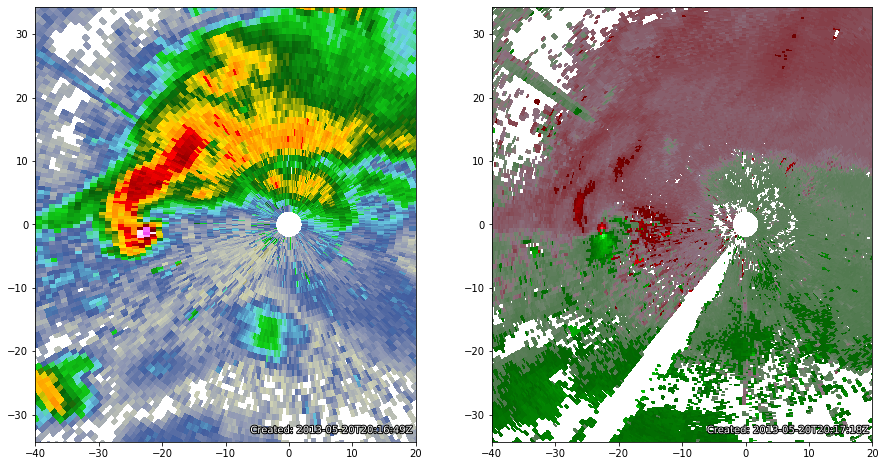

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ctables = (('NWSStormClearReflectivity', -20, 0.5),  # dBZ
           ('NWS8bitVel', -100, 1.0))  # m/s
for v, ctable, ax in zip(('N0Q', 'N0U'), ctables, axes):
    # Open the file
    name = get_test_data(f'nids/KOUN_SDUS54_{v}TLX_201305202016', as_file_obj=False)
    f = Level3File(name)

    # Pull the data out of the file object
    datadict = f.sym_block[0][0]

    # Turn into an array using the scale specified by the file
    data = f.map_data(datadict['data'])

    # Grab azimuths and calculate a range based on number of gates
    az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
    rng = np.linspace(0, f.max_range, data.shape[-1] + 1)

    # Convert az,range to x,y
    xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))

    # Plot the data
    norm, cmap = colortables.get_with_steps(*ctable)
    ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap)
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-40, 20)
    ax.set_ylim(-30, 30)
    add_timestamp(ax, f.metadata['prod_time'], y=0.02, high_contrast=True)

plt.show()